# Data Augmentation - DSSIM LOSS

**Measures**:
* **Val loss TRAIN** (DSSIM)
* **Test MSE**
* **Test PSNR**
* **Test SSIM**
* **Cualitative: show reconstruction, normal and with augmentation**


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quantitative" data-toc-modified-id="Quantitative-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quantitative</a></span><ul class="toc-item"><li><span><a href="#Training-and-validation" data-toc-modified-id="Training-and-validation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training and validation</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test set</a></span></li></ul></li><li><span><a href="#Qualitative-(How-it-reconstruct)---Only-in-Test" data-toc-modified-id="Qualitative-(How-it-reconstruct)---Only-in-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Qualitative (How it reconstruct) - Only in Test</a></span><ul class="toc-item"><li><span><a href="#From-'clean'-images" data-toc-modified-id="From-'clean'-images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>From 'clean' images</a></span></li><li><span><a href="#From-corrupted-inputs" data-toc-modified-id="From-corrupted-inputs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>From corrupted inputs</a></span></li></ul></li></ul></div>

In [1]:
import glob
import os
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3e' % x)

## Quantitative

* **PSNR**
$$PSNR=10\times \log_{10}\frac{peakval^2}{MSE(x,y)}$$
* **DSSIM**
$$Structural Dissimilarity = DSSIM = \frac{1-SSIM(x,y)}{2}$$


### Training and validation

In [2]:
from create_test_report import TestMetricWrapper
model_folders = glob.glob('results/Data_Aug/dssim/*')
model_folders  = [mf for mf in model_folders if 'qualitative' not in mf]
TEST_img_PATH = '..'+os.path.sep+'IXI-T1'+os.path.sep+'PNG'+os.path.sep+'test_folder'+os.path.sep+'test'
test_img_files = glob.glob(TEST_img_PATH+os.path.sep+'*.png')

In [3]:
noaug_mse_test_metrics = TestMetricWrapper(model_folders,test_img_files)

In [4]:
_,_ = noaug_mse_test_metrics.get_training_df()
noaug_mse_test_metrics.get_min_validation_loss_df()

,Val_loss,Epoch
res_skip_cae_DSSIM_AUG_NoKReg_LRPlat,1.504e-03,4.600e+01
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat,4.185e-03,3.700e+01
myronenko_cae_DSSIM_AUG_NoKReg_LRPlat,4.389e-03,2.100e+01
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat,4.416e-03,4.100e+01
skip_con_cae_DSSIM_AUG_L2KReg_LRPlat,4.822e-03,2.400e+01
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat,4.904e-03,1.900e+01


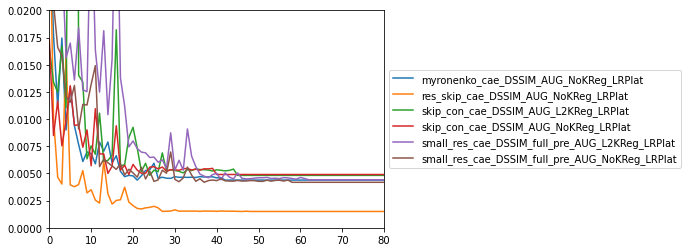

In [11]:
noaug_mse_test_metrics.plot_val_loss(ylimit = 0.02, epochs=80)

### Test set

***Method for getting metrics with keras_evaluate***: *WARN: Metric for models with L2reg add some variation due to L2 in loss*.
```python
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df
```

In [12]:
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df

myronenko_cae_DSSIM_AUG_NoKReg_LRPlat - 603/603 - 10s - loss: 0.0043 - mean_squared_error: 6.6854e-04 - PSNR: 32.0489
res_skip_cae_DSSIM_AUG_NoKReg_LRPlat - 603/603 - 10s - loss: 0.0014 - mean_squared_error: 7.4964e-05 - PSNR: 41.8111
skip_con_cae_DSSIM_AUG_L2KReg_LRPlat - 603/603 - 6s - loss: 0.0047 - mean_squared_error: 4.0835e-04 - PSNR: 34.2193
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat - 603/603 - 6s - loss: 0.0047 - mean_squared_error: 4.5662e-04 - PSNR: 33.7188
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat - 603/603 - 11s - loss: 0.0044 - mean_squared_error: 2.3368e-04 - PSNR: 36.7838
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat - 603/603 - 7s - loss: 0.0041 - mean_squared_error: 2.8770e-04 - PSNR: 35.9141


,loss,mean_squared_error,PSNR
myronenko_cae_DSSIM_AUG_NoKReg_LRPlat,4.314e-03,6.685e-04,3.205e+01
res_skip_cae_DSSIM_AUG_NoKReg_LRPlat,1.443e-03,7.496e-05,4.181e+01
skip_con_cae_DSSIM_AUG_L2KReg_LRPlat,4.666e-03,4.083e-04,3.422e+01
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat,4.713e-03,4.566e-04,3.372e+01
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat,4.376e-03,2.337e-04,3.678e+01
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat,4.144e-03,2.877e-04,3.591e+01


In [13]:
na_mse_custom_df = noaug_mse_test_metrics.get_custom_evaluation(return_type='df', verbose=True)
na_mse_custom_df.sort_values('mse_mean')

myronenko_cae_DSSIM_AUG_NoKReg_LRPlat - MSE: 6.69e-04+-2.49e-04 - DSSIM: 4.31e-03+-1.28e-03 - PSNR: 3.20e+01+-1.64e+00

res_skip_cae_DSSIM_AUG_NoKReg_LRPlat - MSE: 7.50e-05+-4.26e-05 - DSSIM: 1.44e-03+-7.95e-04 - PSNR: 4.18e+01+-2.15e+00

skip_con_cae_DSSIM_AUG_L2KReg_LRPlat - MSE: 4.08e-04+-1.61e-04 - DSSIM: 4.38e-03+-2.20e-03 - PSNR: 3.42e+01+-1.72e+00

skip_con_cae_DSSIM_AUG_NoKReg_LRPlat - MSE: 4.57e-04+-1.73e-04 - DSSIM: 4.71e-03+-2.40e-03 - PSNR: 3.37e+01+-1.69e+00

small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat - MSE: 2.34e-04+-1.09e-04 - DSSIM: 3.70e-03+-1.29e-03 - PSNR: 3.68e+01+-2.08e+00

small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat - MSE: 2.88e-04+-1.42e-04 - DSSIM: 4.14e-03+-1.28e-03 - PSNR: 3.59e+01+-2.13e+00



,mse_mean,mse_std,dssim_mean,dssim_std,psnr_mean,psnr_std
res_skip_cae_DSSIM_AUG_NoKReg_LRPlat,7.496e-05,4.262e-05,1.443e-03,7.946e-04,4.181e+01,2.154e+00
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat,2.337e-04,1.088e-04,3.701e-03,1.294e-03,3.678e+01,2.077e+00
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat,2.877e-04,1.421e-04,4.144e-03,1.282e-03,3.591e+01,2.130e+00
skip_con_cae_DSSIM_AUG_L2KReg_LRPlat,4.083e-04,1.605e-04,4.380e-03,2.200e-03,3.422e+01,1.720e+00
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat,4.566e-04,1.730e-04,4.713e-03,2.401e-03,3.372e+01,1.692e+00
myronenko_cae_DSSIM_AUG_NoKReg_LRPlat,6.685e-04,2.489e-04,4.314e-03,1.276e-03,3.205e+01,1.637e+00


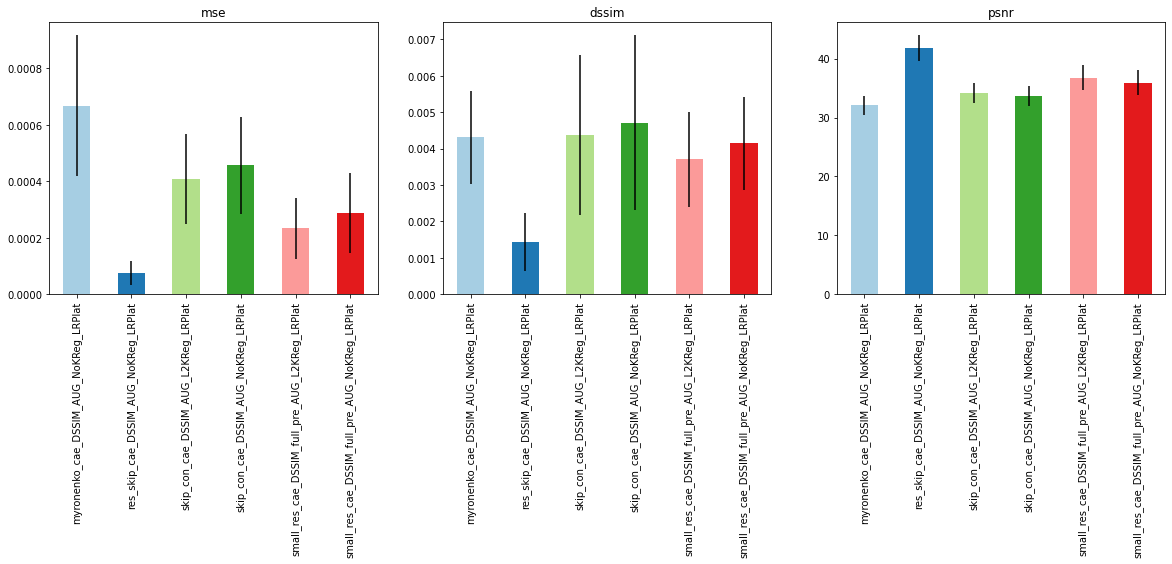

In [14]:
no_aug_mse_plot = noaug_mse_test_metrics.plot_custom_metrics()

## Qualitative (How it reconstruct) - Only in Test
### From 'clean' images
How the models reconstruct unmodified input MRIs?

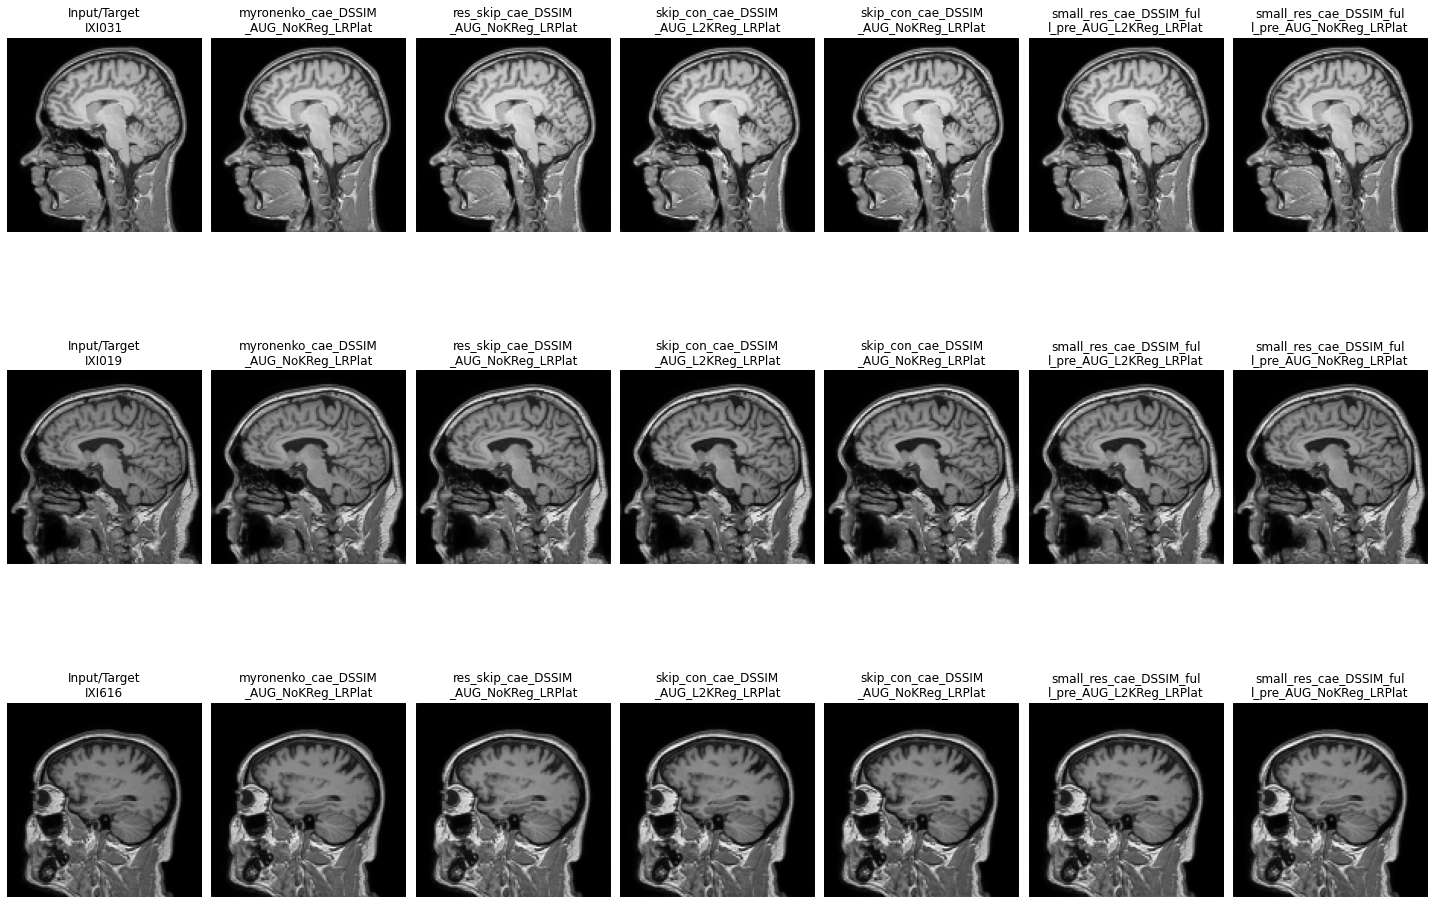

In [5]:
clear_mris = noaug_mse_test_metrics.plot_images(id_images = [183,75], n_random=1, figsize=(20,15)) #id=800 is a good slice too

### From corrupted inputs

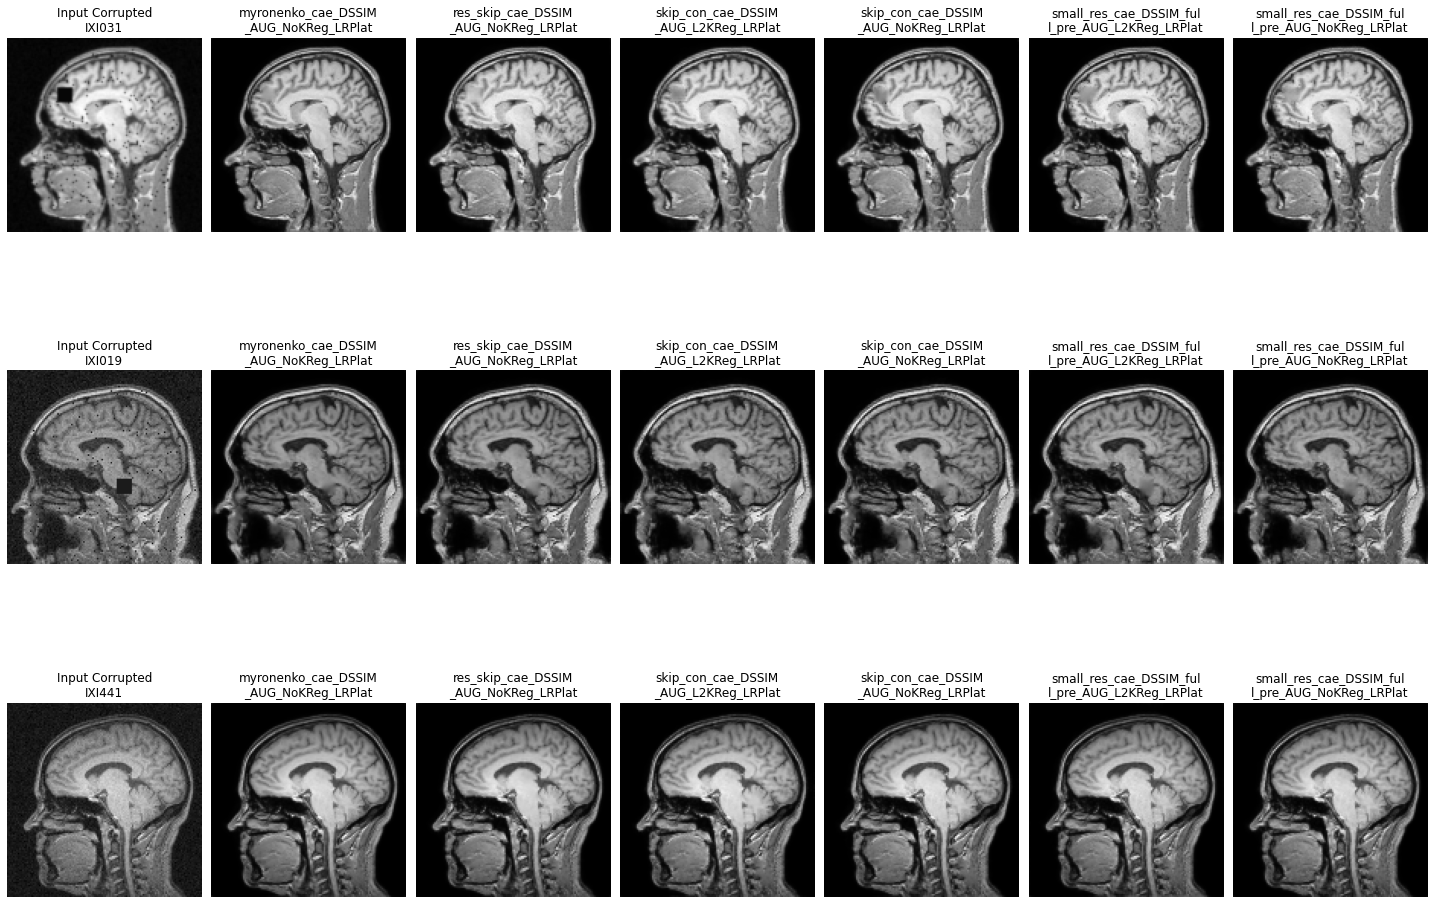

In [9]:
corrupted_mris, sel_images = noaug_mse_test_metrics.plot_corrupted_images(id_images = [183,75], n_random=1, figsize=(20,15)) # 6 